# Mnist dataset 

doing the handwritten digits recognition with the mnist dataset 

#baseline 


doing the image recognition for `3 and 7`

In [1]:
!pip install fastbook 

from fastai import * 
from fastai.vision.all import *
from fastbook import *

     |████████████████████████████████| 727kB 8.1MB/s 
     |████████████████████████████████| 1.2MB 17.6MB/s 
     |████████████████████████████████| 194kB 37.4MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
Path.BASE_PATH = path 
path

Path('.')

In [4]:
path.ls() # shows the what's in the path 

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [5]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()

In [6]:
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [7]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [8]:
np.array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [9]:
tensor(im3)[4:10,4:10] # pytorch version of the same array 

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [10]:
# pytorch tensors have the GPU provides the computation advantage 


In [11]:
# grabbing the tensor 3 and converting to the pandas dataframe 
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,5:22])
df.style.set_properties(**{'font-size' : '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [12]:
# making the lists of all of the 7's 

seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

len(three_tensors), len(seven_tensors)

(6131, 6265)

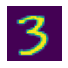

In [13]:
show_image(three_tensors[1])

In [14]:
three_tensors[1].shape

torch.Size([28, 28])

In [15]:
type(three_tensors)

list

In [16]:
# converting the list of iamges ( which are 3 and 7 ) into tensors 
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [17]:
# rank is the number of dimensions or shape of the tensor 


In [18]:
# stacked_threes.mean()  # average pixel of the whole cube 
# stacked_threes.mean(0) # average pixel across the 0th axis  

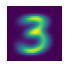

In [19]:
show_image(stacked_threes.mean(0))

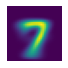

In [20]:
show_image(stacked_sevens.mean(0))

In [21]:
dist_3_abs = (stacked_threes[1] - stacked_threes.mean(0)).abs().mean()
dist_3_sqr = ((stacked_threes[1]-stacked_threes.mean(0))**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [22]:
dist_7_abs = (stacked_threes[1] - stacked_sevens.mean(0)).abs().mean()
dist_7_sqr = ((stacked_threes[1]-stacked_threes.mean(0))**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.2021))

as we see above the absolute and squared error is less with three so we can conclude that the stacked image is of 3 and it's relatively greater for 7_abs and 7_sqr

In [23]:
# for finding the type of tensor in fast ai is quite different than that of the type of tensors in the python 
# in python it's like type(tensor) but in fast ai it's like tensor.type()
dist_7_abs.type()

'torch.FloatTensor'

In [24]:
# checking how our model is performing on the validation data 
# 1.st loading the data 
valid_3_tens  = torch.stack([tensor(Image.open(o)) for o in (path/'valid/3').ls()])
valid_3_tens = valid_3_tens.float()/255.

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid/7').ls()])
valid_7_tens = valid_7_tens.float()/255.
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [25]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

In [26]:
valid_3_dist = mnist_distance(valid_3_tens,stacked_threes.mean(0))

In [27]:
valid_3_dist, valid_3_dist.shape

(tensor([0.1463, 0.1076, 0.1296,  ..., 0.1776, 0.1209, 0.1531]),
 torch.Size([1010]))

In [28]:
def is_3(x): return mnist_distance(x,stacked_threes.mean(0)) < mnist_distance(x,stacked_sevens.mean(0))

In [29]:
is_3(valid_3_tens[4])

tensor(True)

In [30]:
is_3(valid_7_tens[5]).float()

tensor(0.)

In [31]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [32]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1-is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [33]:
# here we've model of the 95% accuracy 

# working with the gradients 

1. initialize the random gradients 
2. for each image , use these weights to predict wheather it appers to be a three or seven 
3. Based on these predictions , calculate how good the model is ( it's loss ) 
4. calculate the gradient, which measures for each weiight how changing the weight would change the loss 
5. step , all weights based on the calculations 
6. repeat whole process from 2nd step 
7. do it until you are satisfied by the results 

## init ----> predict ------> loss ---> gradient ---> step repeat ------> stop 

In [34]:
# loss will be small when the performance of the model is good 


In [35]:
def f(x) : return x**2

In [36]:
# plot_function(f,'x','x**2') # 1st parar is the function name itself 2nd is the x label and 3rd is the y label 

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


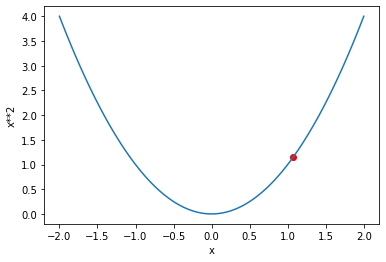

In [37]:
# here we are trying to find the lowest point in the loss fun  f 
plot_function(f,'x','x**2')
value = 1.07 #@param {type:"slider", min:-2, max:2, step:0.01}
plt.scatter(value,f(value),color = 'red') 

In [38]:
# WE for modifying the funcion later and to tell pytorch to remember that you have to do this some derivative and calculationns later 
xt = tensor(3.).requires_grad_() # underscroll at the end of function in pytorch means in place modification it modifies the value which you are gonna pass 

In [39]:
# it keeps track of all the computitions we do in order to calculate derivative later 
yt = f(xt)
yt # here you have noticed that tensor gives the grad_fn also so we can give the derivative out here by using backward() method 

tensor(9., grad_fn=<PowBackward0>)

In [40]:
yt.backward() # for telling pytorch to calculate the derivative 

In [41]:
xt.grad # getting result from dertivative function where we have declared requires_grad 

tensor(6.)

# working with the gradients 

In [42]:
xt.grad??

In [43]:
xt.grad.data

tensor(6.)

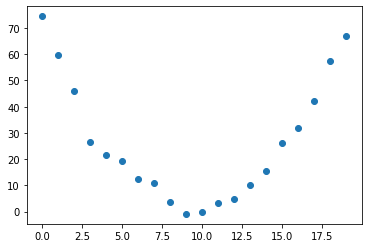

In [44]:
time = torch.arange(0,20).float(); time
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

plt.scatter(time,speed)
def f(t,params): 
  a,b,c = params 
  return a*(t**2) + (b*t) + c 
  

In [45]:

def mse(preds,targets):return ((preds-targets) ** 2).mean().sqrt()


In [46]:

params = torch.randn(3).requires_grad_()
orig_params = params.clone()
preds = f(time,params)


In [47]:
def show_preds(preds,ax = None):
  if ax is None : ax = plt.subplots()[1]
  ax.scatter(time,speed)
  ax.scatter(time,to_np(preds),color = 'red')
  ax.set_ylim(-300,1000)


tensor(160.4228, grad_fn=<SqrtBackward>)

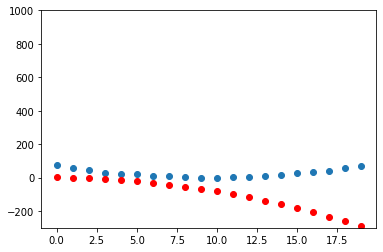

In [48]:
show_preds(preds)
loss = mse(preds,speed)
loss 
loss.backward()
params.grad
params.grad * 1e-5
params 
lr = 1e-5 
params.data -= lr * params.grad.data
params.grad = None
preds = f(time,params)
mse(preds,speed)


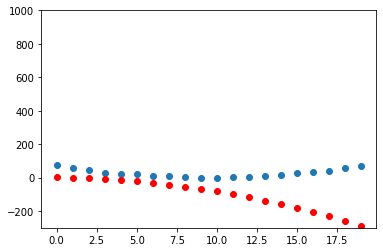

In [49]:
show_preds(preds)


In [50]:
def apply_step(params, prn = True):
    # print(f'params are {params}')
    preds = f(time,params)
    loss = mse(preds,speed)
    loss.backward()
    params.data -= lr * params.grad.data
    # params.grad = None
    print(f'params after params.grad = none {params.data} and params.grad are {params.grad}')
    if prn: print(loss.item())
    return preds
for i in range(10): apply_step(params)

params after params.grad = none tensor([-0.7625, -0.7504,  1.3526]) and params.grad are tensor([-165.5075,  -10.6397,   -0.7900])
160.42279052734375
params after params.grad = none tensor([-0.7592, -0.7502,  1.3526]) and params.grad are tensor([-331.0073,  -21.2790,   -1.5801])
160.14772033691406
params after params.grad = none tensor([-0.7543, -0.7499,  1.3526]) and params.grad are tensor([-496.4915,  -31.9174,   -2.3704])
159.59765625
params after params.grad = none tensor([-0.7476, -0.7495,  1.3526]) and params.grad are tensor([-661.9523,  -42.5543,   -3.1609])
158.772705078125
params after params.grad = none tensor([-0.7394, -0.7489,  1.3527]) and params.grad are tensor([-827.3810,  -53.1893,   -3.9517])
157.67298889160156
params after params.grad = none tensor([-0.7294, -0.7483,  1.3527]) and params.grad are tensor([-992.7689,  -63.8218,   -4.7429])
156.29873657226562
params after params.grad = none tensor([-0.7179, -0.7475,  1.3528]) and params.grad are tensor([-1158.1062,   -74.

if we wanted to find the minima of the gradients or functions we will have to define the speed at which we are gonna take a step and set the learning rate 

params after params.grad = none tensor([-0.6550, -0.7435,  1.3531]) and params.grad are tensor([-1818.7219,  -116.9250,    -8.7075])
params after params.grad = none tensor([-0.6352, -0.7422,  1.3532]) and params.grad are tensor([-1983.6228,  -127.5281,    -9.5029])
params after params.grad = none tensor([-0.6137, -0.7408,  1.3533]) and params.grad are tensor([-2148.3872,  -138.1229,   -10.2993])
params after params.grad = none tensor([-0.5906, -0.7394,  1.3534]) and params.grad are tensor([-2312.9927,  -148.7081,   -11.0970])


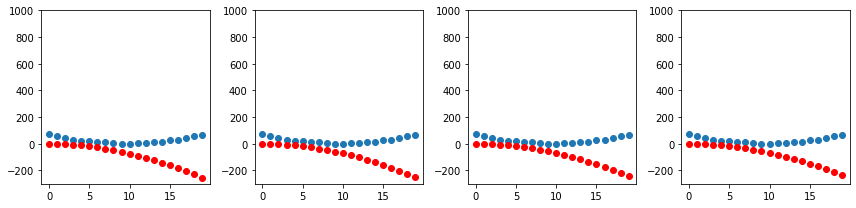

In [51]:
_, axs = plt.subplots(1,4,figsize = (12,3))
for ax in axs : show_preds(apply_step(params,False),ax)
plt.tight_layout()

# MNIST loss function 

In [52]:
# we've to calculate the gradient where the difference is really small 

In [53]:
# if we change the param for small amount then there will be no change in the accuracy of the

In [54]:
train_x  = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [55]:
train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)

In [56]:
val_x = torch.cat([valid_3_tens , valid_7_tens]).view(-1,28*28)
val_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(val_x, val_y))

In [57]:
train_y.shape

torch.Size([12396, 1])

In [58]:
dset = list(zip(train_x,train_y)) 
x, y = dset[0]
x.shape, y 

(torch.Size([784]), tensor([1]))

In [59]:
def init_params(size , std = 1.0) : return (torch.randn(size)* std).requires_grad_()

In [60]:
weights = init_params((28*28,1))

In [61]:
bias = init_params(1)

In [62]:
(train_x[0] * weights.T).sum() + bias 

tensor([20.2336], grad_fn=<AddBackward0>)

In [63]:
#in python the matrix multiplication is represented by @ operator   

def linear1(xb): return xb@weights + bias 

In [64]:
preds = linear1(train_x)

In [65]:
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [66]:
corrects = (preds> 0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [67]:
corrects.float().mean().item()

0.4912068545818329

In [68]:
# this means that our model is predicting the correct answers half of the times 


In [69]:
#without items in the correct.float().mean() it just returns the tensor 
corrects.float().mean()

tensor(0.4912)

In [70]:
# determining the change in accuracy for the small change in the weights 
weights[0] *= 1.0001

RuntimeError: ignored

In [71]:
# if we did the prediction with the help of above function then we have to create the loss function


In [72]:
# slightly better predictions should have slightly better loss 


In [73]:
trgts = tensor([1,0,1])
prds = tensor([0.9,0.4,0.2])

In [74]:
def mnist_loss(predictions , targets):
  return torch.where(targets == 1, 1-predictions , predictions).mean()

In [75]:
# here in the above loss functions when the predictions are right with the high prediction proba then the loss 
# is less if the predictions is wrong with the higher probability the loss will be higher

# torch.where(cond, a, b) if cond is true then do a otherwise give out b 

In [76]:
mnist_loss(prds,trgts)

tensor(0.4333)

the above mnist function is only gonna work when the prediction is in between 0 and 1 if it's greater than 1 then or less than 0 then our loss function won't work 

# we need to make sure now that our predictions are in between 0 and 1 

In [77]:
#sigmoid function
def sigmoid(x): return 1/(1+torch.exp(-x))

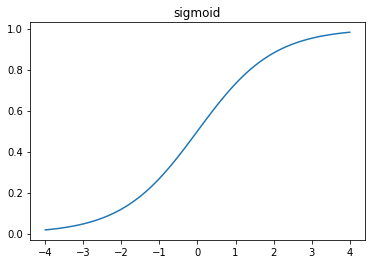

In [78]:
plot_function(torch.sigmoid,title = 'sigmoid', min =-4, max = 4 )

In [79]:
def mnist_loss(predictions, targets):
  predictions = predictions.sigmoid()
  return torch.where(targets == 1 , 1- predictions, predictions).mean()

# SGD and the mini batches 


In [80]:
coll = range(15)
dl = DataLoader(coll, batch_size = 5, shuffle = True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [81]:
# careting the tuple on teh based of the english letters 
ds = L(enumerate(string.ascii_lowercase))
ds 

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [82]:
# L?? l is the calss whih used to list the list iterator items into teh array of tuples 

In [83]:
dl = DataLoader(ds, batch_size = 6 , shuffle = True)
dl

# Putting all the data together 

1. iterate through the x , y in dl 
2. make the predictions wiht the models 
3. calculate the loss using loss function 
4. calculate the loss derivative using loss.backward() 
5. update the parameters using paramerters -= parammeters.grad * lr 

In [84]:
weights = init_params((28*28), 1)
bias = init_params(1)

In [85]:
dl = DataLoader(dset, batch_size = 256) 
xb,yb = first(dl)
xb.shape , yb.shape 

(torch.Size([256, 784]), torch.Size([256, 1]))

In [86]:
valid_data = DataLoader(valid_dset, batch_size=256 )

In [87]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [88]:
linear1??

In [89]:
preds  = linear1(batch)
preds

tensor([ -8.7744,  -8.0637,  -8.1532, -16.9030], grad_fn=<AddBackward0>)

In [90]:
loss = mnist_loss(preds, train_y[:4])
loss 

tensor(0.9998, grad_fn=<MeanBackward0>)

In [91]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784]), tensor(-2.7033e-05), tensor([-0.0002]))

## putting everything in the functions 

In [92]:
def calc_grad(xb,yb,model):
  preds = model(xb) 
  loss = mnist_loss(preds,yb)
  loss.backward()

In [93]:
calc_grad(batch,train_y[:4],linear1)
weights.grad.mean(),bias.grad

(tensor(-5.4066e-05), tensor([-0.0004]))

In [94]:
calc_grad(batch,train_y[:4],linear1)
weights.grad.mean(),bias.grad

(tensor(-8.1099e-05), tensor([-0.0006]))

loss.backward not just calculates the gradient it calculates the gradient and add them in the gradient variable

In [95]:
weights.grad.zero_()
bias.grad.zero_();

In [96]:
def train_epoch(model, lr , params): 
  for xb, yb in dl :
    calc_grad(xb,yb,model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

if we assign the data attribute to params pytorch will not store or calculate the gradients on that data grad we have declared 

In [97]:
def batch_accuracy(xb,yb):
  preds = xb.sigmoid()
  correct = (preds > 0.5) == yb 
  return correct.float().mean()

In [98]:
def validation_epoch(model):
  acs = [batch_accuracy(model(xb),yb) for xb,yb in valid_data]
  return round(torch.stack(acs).mean().item(),4 )

In [99]:
validation_epoch(linear1)

0.2947

let's train for one epoch 


In [100]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr , params)
validation_epoch(linear1)

0.5164

In [101]:
for i in range(20):
  train_epoch(linear1,lr,params)
  print(validation_epoch(linear1))

0.6619
0.8084
0.8944
0.9206
0.9325
0.9391
0.9433
0.9472
0.9534
0.9544
0.9558
0.9562
0.9567
0.9567
0.9572
0.9577
0.9577
0.9581
0.9591
0.9591


# creating the optimizer

In [102]:
linear_model = nn.Linear(28*28,1)

In [103]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

we can use this info to create the optimizer 

In [104]:
class BasicOptim:
  def __init__(self, params,lr):self.params,self.lr = list(params),lr
  def step(self, *args, **kwargs):
    for p in self.params: p.data -= p.grad.data * self.lr

  def zero_grad(self,*args, **kwargs):
    for p in self.params:p.grad = None

In [105]:
opt = BasicOptim(linear_model.parameters(), lr)

In [106]:
def train_epoch(model):
  for xb,yb in dl: 
    calc_grad(xb,yb,model)
    opt.step()
    opt.zero_grad()

In [107]:
validation_epoch(linear_model)

0.5201

In [108]:
def train_model(model,epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validation_epoch(model))

In [109]:
train_model(linear_model,20)

0.4932
0.73
0.8559
0.9179
0.9345
0.9487
0.957
0.9633
0.9658
0.9672
0.9702
0.9726
0.9741
0.9751
0.976
0.977
0.9775
0.9775
0.9785
0.979


In [110]:
linear_model = nn.Linear(28*28, 1) 
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20 ) 

0.4932
0.792
0.8535
0.9175
0.9345
0.9487
0.957
0.9624
0.9658
0.9677
0.9692
0.9712
0.9736
0.9751
0.976
0.9765
0.9775
0.9785
0.9785
0.9785


In [111]:
dls = DataLoaders(dset, valid_dset)

In [112]:
learn = Learner(dls, nn.Linear(28*28,1 ), opt_func = SGD, loss_func = mnist_loss, metrics = batch_accuracy)

In [114]:
learn.fit(10 , lr = 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.000036,0.107656,0.894504,00:28
1,0.000020,0.087540,0.911187,00:28
2,0.000015,0.079067,0.922964,00:28
3,0.000014,0.069959,0.933268,00:29
4,0.000010,0.062686,0.940137,00:28
5,0.000006,0.060479,0.941609,00:28
6,0.000004,0.057918,0.944063,00:28
7,0.000004,0.055364,0.947007,00:28
8,0.000004,0.053184,0.948970,00:28
9,0.000004,0.051356,0.949951,00:28


#adding Non lienarity  

In [115]:
def simple_net(xb):
  res = xb@w1 + b1 
  res = res.max(tensor(0.0))
  res = res* w2 + b2 
  return res 

In [116]:
w1  = init_params((28*28, 30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)


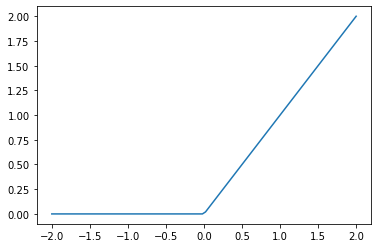

In [117]:
plot_function(F.relu)

In [118]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30), 
    nn.ReLU(),
    nn.Linear(30,1)
)

In [119]:
learn = Learner(dls, simple_net , opt_func = SGD, 
                loss_func = mnist_loss, metrics = batch_accuracy)

In [121]:
learn.fit(4, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.000000,0.072132,0.928852,00:33
1,0.000000,0.070608,0.929833,00:32
2,0.000000,0.085975,0.914622,00:32
3,0.000000,0.042357,0.956820,00:32


In [122]:
m = learn.model
m

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)

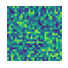

In [137]:
w,b = m[0].parameters()
no = 7 #@param {type:"slider", min:0, max:30, step:1}
show_image(w[no].view(28,28))

In [138]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls , resnet18, pretrained = False, loss_func = F.cross_entropy,metrics = accuracy)
learn.fit_one_cycle(1,0.1)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,accuracy,time
0,0.072696,0.011054,0.995584,00:23


Thu Jul  1 08:53:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    38W / 250W |   1179MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------